# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df = df.sample(n=100000, random_state = 42)

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
5156943,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
5189870,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
1551677,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,243.709070,1.805811e+05,8.366804e+05,8.582234e+05,1.104193e+06,1.230055e+06,0.001410,0.000010
std,142.518613,5.586699e+05,2.901104e+06,2.936799e+06,3.223011e+06,3.475326e+06,0.037524,0.003162
min,1.000000,9.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.350821e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,240.000000,7.603086e+04,1.393850e+04,0.000000e+00,1.387482e+05,2.185786e+05,0.000000,0.000000
75%,335.000000,2.091130e+05,1.070771e+05,1.464169e+05,9.605963e+05,1.126011e+06,0.000000,0.000000
max,736.000000,3.697390e+07,3.359321e+07,3.388709e+07,2.362896e+08,2.724047e+08,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3737323 to 6142173
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB


In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

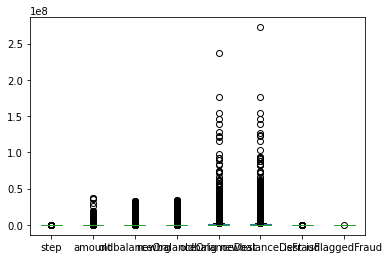

In [7]:
df.plot.box()

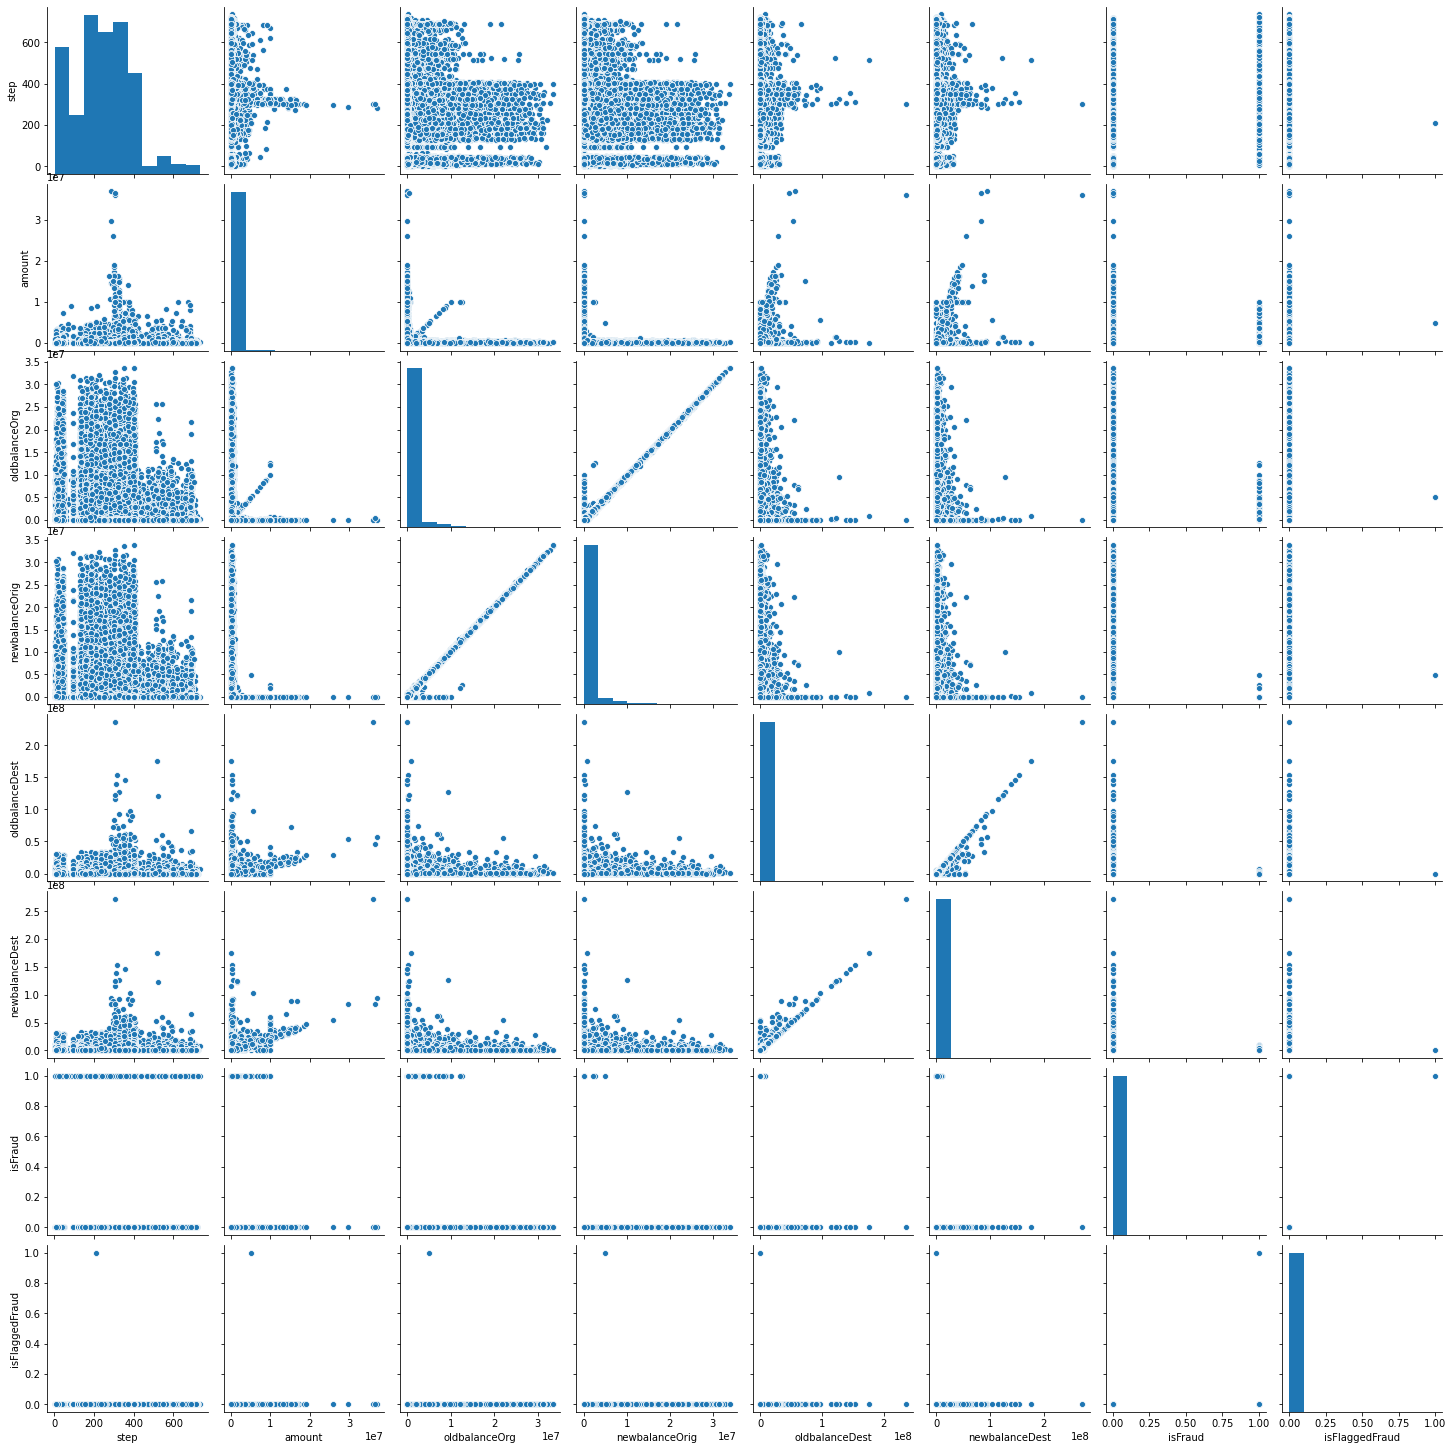

In [8]:
sns.pairplot(df)

### What is the distribution of the outcome? 

In [9]:
# Your response here
df['isFraud'].value_counts()

0    99859
1      141
Name: isFraud, dtype: int64

In [10]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
5156943,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
5189870,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
1551677,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0


### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [11]:
# Your code here
df = pd.get_dummies(df,columns = ['type'])
df.drop(labels = ['nameOrig','nameDest'], axis = 1, inplace = True)


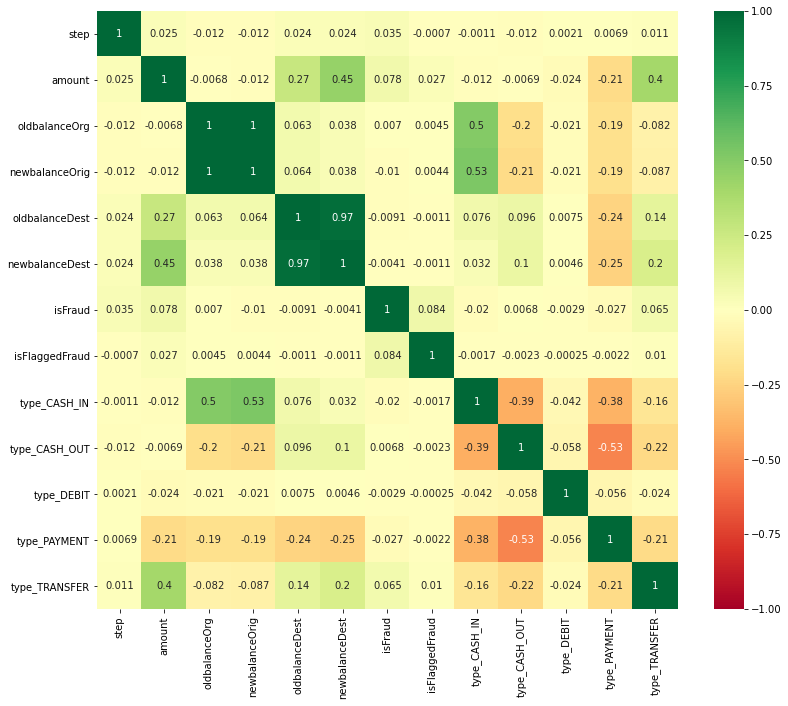

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

In [13]:
df.drop(labels = ['oldbalanceOrg','oldbalanceDest'], axis = 1, inplace = True)

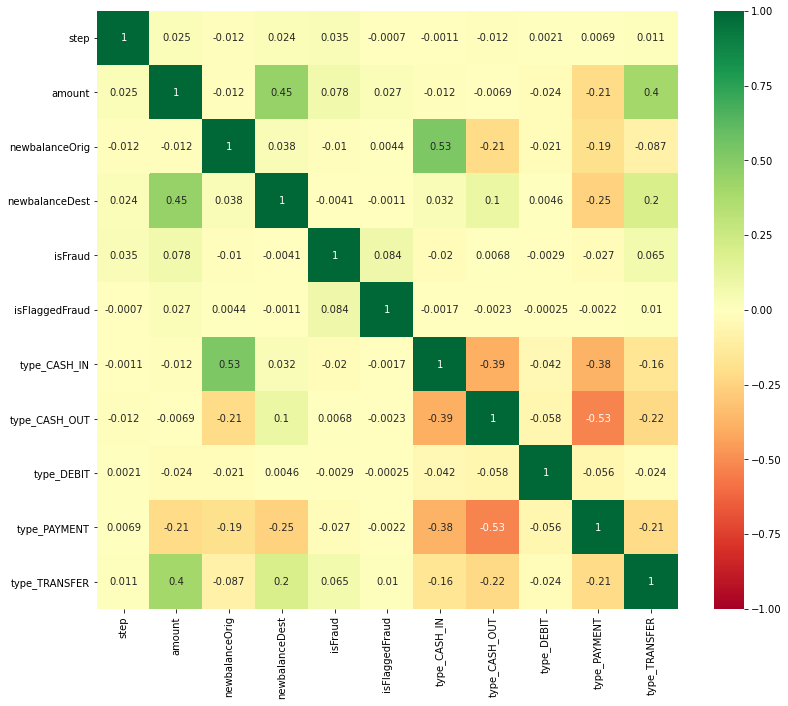

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

### Run a logisitc regression classifier and evaluate its accuracy.

In [16]:
df

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3737323,278,330218.42,351084.42,122201.15,0,0,1,0,0,0,0
264914,15,11647.08,18722.92,0.00,0,0,0,0,0,1,0
85647,10,152264.21,258853.21,49038.80,0,0,1,0,0,0,0
5899326,403,1551760.63,0.00,4750120.08,0,0,0,0,0,0,1
2544263,206,78172.30,2999503.88,337649.60,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,371042.71,2070408.56,3930530.15,0,0,1,0,0,0,0
5156943,357,19494.57,1940583.68,56140.95,0,0,1,0,0,0,0
5189870,369,141519.24,0.00,12994793.47,0,0,0,1,0,0,0
1551677,154,635412.68,694022.68,0.00,0,0,1,0,0,0,0


In [17]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y= df['isFraud']
X = df.drop(labels = 'isFraud', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)
model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[19933    33]
 [   29     5]]
0.9969


### Now pick a model of your choice and evaluate its accuracy.

In [23]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[19960     6]
 [   21    13]]
0.99865


### Which model worked better and how do you know?

In [14]:
# Your response here
#if what i did makes sense and is correct, both models have incredible accuracies, 
#which is what makes me think i overfitted the models
#anyway, the second model has a slightly better accuracy score and the confusion matrix shows in the second model has +27 true positives 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.